# Traffic Sign Classification with Keras CNN
- dataset: https://bitbucket.org/jadslim/german-traffic-signs

In [8]:
# only need to do this once!
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.
Checking connectivity... done.


### view what's in the repo
- they are pickle files (serialized data)
- https://docs.python.org/2/library/pickle.html

In [9]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
import pickle
import pandas as pd

### Functions
- TODO: parameterize the model

In [11]:
def preProcess(img):
    """Convert to grayscale, equalize the histogram, normalize the pixel distribution, then add depth of 1 for the CNN"""
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    img = img.reshape(32, 32, 1)
    return img

def leNetModel():
    """
    Create a LeNet CNN Model
    See https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/ for model parameter tutorial
    https://www.pyimagesearch.com/2018/09/10/keras-tutorial-how-to-get-started-with-keras-deep-learning-and-python/
    """
    model = Sequential()
    model.add(Conv2D(64, (3,3), input_shape=(32,32,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(Dropout(.25))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(43, activation='softmax'))
    model.compile(Adam(.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def customModel():
    """
    Create a LeNet CNN Model
    See https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/ for model parameter tutorial
    https://www.pyimagesearch.com/2018/09/10/keras-tutorial-how-to-get-started-with-keras-deep-learning-and-python/
    """
    model = Sequential()
    model.add(Conv2D(32, (5,5), input_shape=(32,32,1), activation='relu'))
    model.add(Conv2D(64, (5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(Conv2D(64, (5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(dropout(.5))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(43, activation='softmax'))
    model.compile(Adam(.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Unpickle the files
- rb is read-bytes
- create train, test, validation sets

In [12]:
with open('german-traffic-signs/train.p', 'rb') as f:
    data = pickle.load(f)
    X_train, y_train = data['features'], data['labels']
#print(type(X_train))
#print(X_train.keys())

In [13]:
with open('german-traffic-signs/test.p', 'rb') as f:
    data = pickle.load(f)
    X_test, y_test = data['features'], data['labels']

In [14]:
with open('german-traffic-signs/valid.p', 'rb') as f:
    data = pickle.load(f)
    X_val, y_val = data['features'], data['labels']

In [15]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


### Check out the csv file

In [16]:
df = pd.read_csv('german-traffic-signs/signnames.csv')

In [17]:
print(df)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

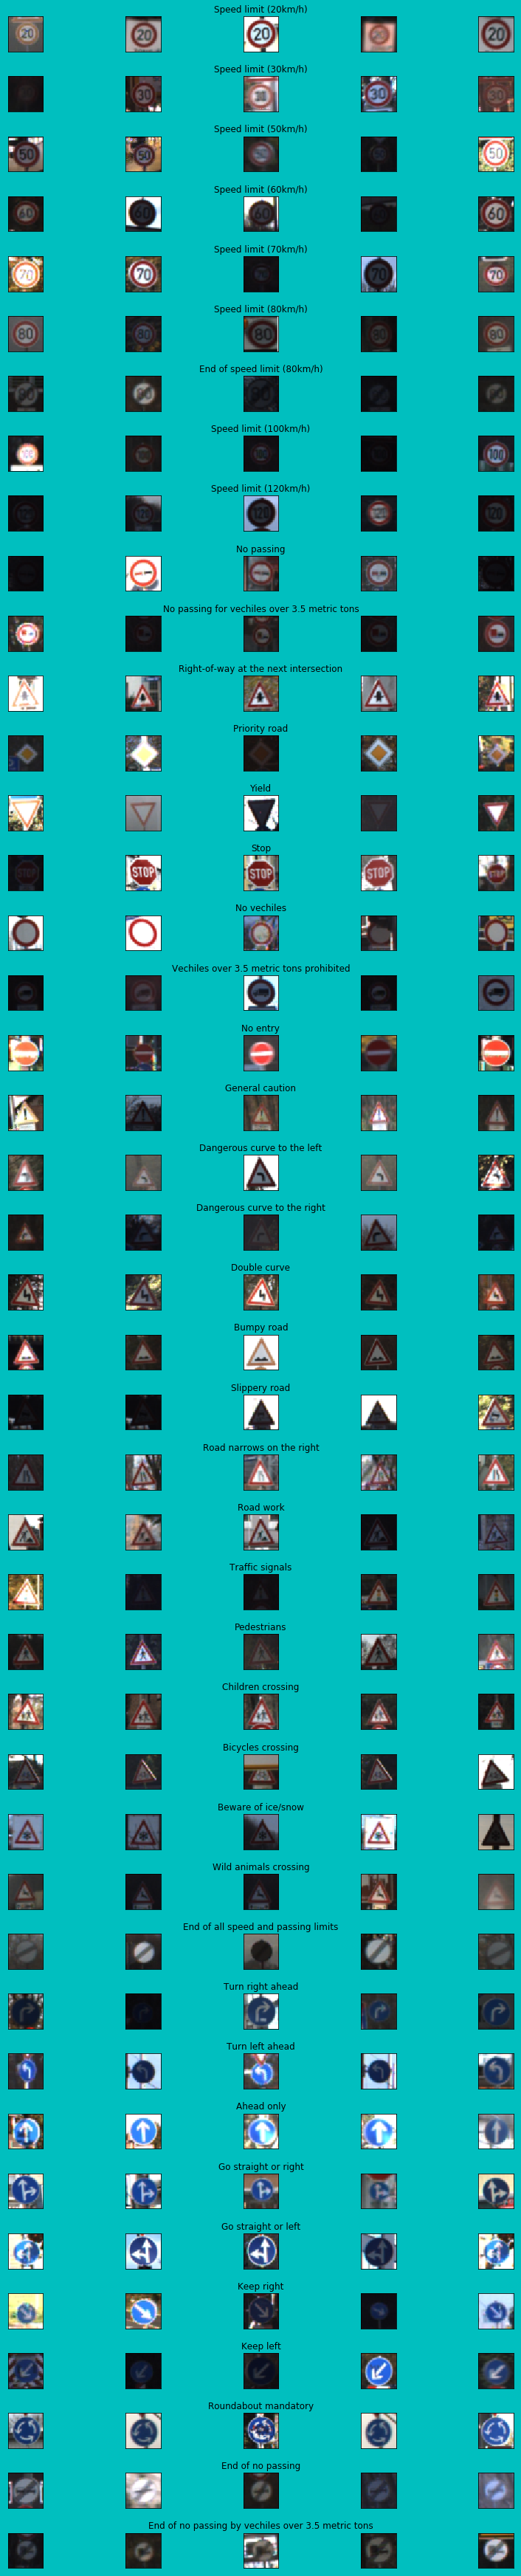

In [18]:
numSamples = []
labels = []
rows = 43
cols = 5
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(40,60))
fig.set_facecolor('c')
fig.subplots_adjust(left=.125, bottom=.1, right=.9, top=.9, wspace=-.9, hspace=.7)
#fig.tight_layout()
for i in range(0, cols):
    for j, row in df.iterrows():
        _x = X_train[y_train==j]
        axes[j][i].imshow(_x[random.randint(0, len(_x)-1), :,:]) #could use cmap="gray"
        axes[j][i].set_xticks([]) #turns the tick marks off
        axes[j][i].set_yticks([])
        if(i == 2):
            axes[j][i].set_title(row["SignName"])
            labels.append(row["SignName"][:20])
            numSamples.append(len(_x))

### Display the distribution

In [19]:
#print(labels)
#print(numSamples)

In [20]:
x = np.arange(43, dtype=int)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


([<matplotlib.axis.XTick at 0x7f17d0234198>,
 <a list of 43 Text xticklabel objects>)

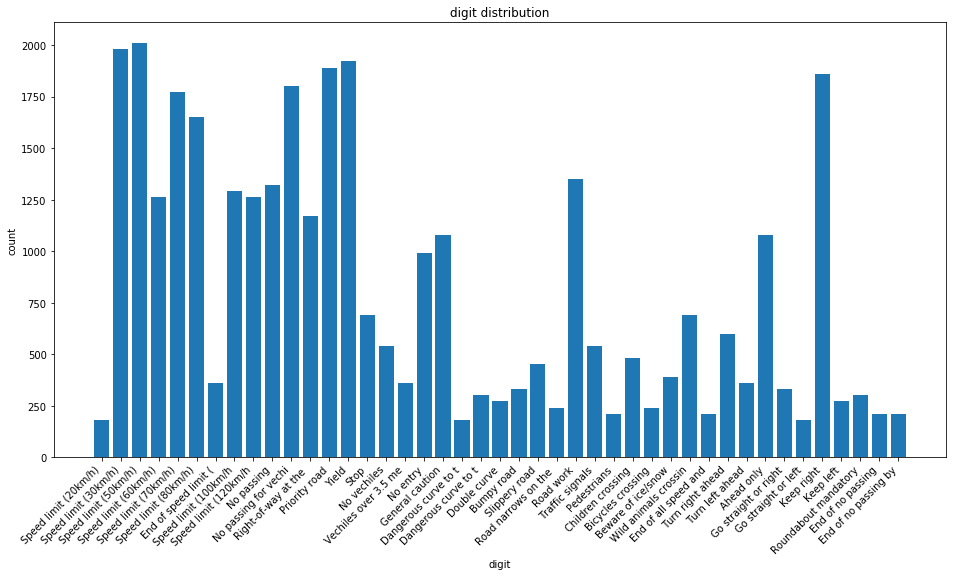

In [21]:
plt.figure(figsize=(16,8))
plt.bar(range(0,rows), numSamples)
plt.title("digit distribution")
plt.xticks(x,labels, rotation=45, ha='right')
plt.xlabel("digit")
plt.ylabel("count")
plt.xticks(np.arange(0,rows,1))

### Balance the dataset
- TODO: Balance the dataset!!

In [22]:
print(X_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


### Preprocess an example image
- convert to gray
- histogram equalization 
- https://www.tutorialspoint.com/dip/histogram_equalization.htm
- https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html

In [23]:
img = X_test[27]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eqh = cv2.equalizeHist(gray)

lbl = labels[y_test[27]]
print(X_train[1000].shape)

(32, 32, 3)


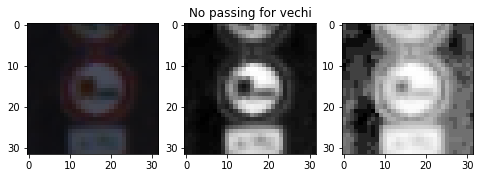

In [24]:
fig=plt.figure(figsize=(8,8)) #8"x8" figure
fig.add_subplot(1,3, 1)
plt.imshow(img)
fig.add_subplot(1,3, 2)
plt.imshow(gray, cmap='gray')
plt.title(lbl)
fig.add_subplot(1,3, 3)
plt.imshow(eqh, cmap='gray')
plt.show()

In [25]:
hist1 = cv2.calcHist([gray], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([eqh], [0], None, [256], [0, 256])
norm = eqh/255
#print(norm)
#print(eqh)

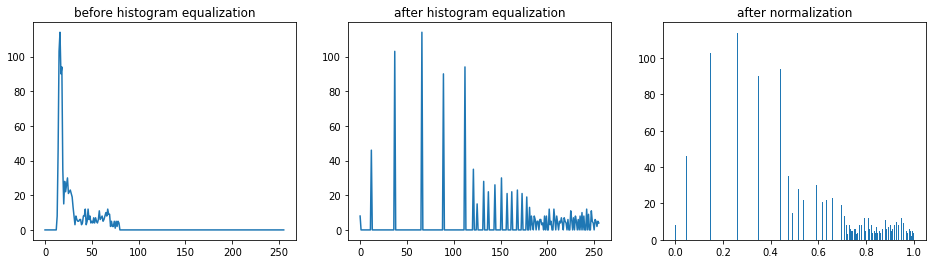

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = plt.subplot("131")
ax.set_title("before histogram equalization")
ax.plot(hist1)
ax = plt.subplot("132")
ax.set_title("after histogram equalization")
ax.plot(hist2)
ax = plt.subplot("133")
ax.set_title("after normalization")
ax.hist(norm.ravel(),256,[0,1])
plt.show()

### Preprocess the datasets

In [ ]:
X_train = np.array(list(map(preProcess, X_train)))
X_val = np.array(list(map(preProcess, X_val)))
X_test = np.array(list(map(preProcess, X_test)))

Text(0.5, 1.0, 'processed sample of size: (32, 32)')

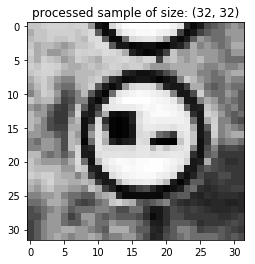

In [ ]:
#need to reshape it back to (32,32) so matplotlib can show it
sample = X_train[random.randint(0, len(X_train)-1)].reshape(32, 32)
plt.imshow(sample, cmap='gray')
plt.title("processed sample of size: %s" % str(sample.shape))

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


### Onehot encode the labels

In [ ]:
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

### Create a CNN Model

In [ ]:
model = leNetModel()
#model = customModel()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               590336    
__________

### Train the model

In [ ]:
hist = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=400, verbose=1, shuffle=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 27s 790us/step - loss: 3.1053 - acc: 0.1690 - val_loss: 1.9568 - val_acc: 0.4095
Epoch 2/10
34799/34799 [==============================] - 27s 771us/step - loss: 1.7257 - acc: 0.4596 - val_loss: 1.5606 - val_acc: 0.5168
Epoch 3/10
34799/34799 [==============================] - 27s 768us/step - loss: 1.5059 - acc: 0.5233 - val_loss: 1.3772 - val_acc: 0.5837
Epoch 4/10
34799/34799 [==============================] - 27s 765us/step - loss: 1.3870 - acc: 0.5547 - val_loss: 1.2499 - val_acc: 0.6463
Epoch 5/10
34799/34799 [==============================] - 27s 769us/step - loss: 1.2677 - acc: 0.5923 - val_loss: 1.2310 - val_acc: 0.6302
Epoch 6/10
34799/34799 [==============================] - 27s 770us/step - loss: 1.1901 - acc: 0.6152 - val_loss: 1.0589 - val_acc: 0.6989
Epoch 7/10
34799/34799 [==============================] - 27s 770us/step - loss: 1.1234 - acc: 0.6409 - val_loss: 0.9

### Model performance
- good explaination of model loss and accuracy https://stackoverflow.com/questions/34518656/how-to-interpret-loss-and-accuracy-for-a-machine-learning-model
- the larger the gap between the validation and training loss / accuracy, the higher the chance that the model is overfitting

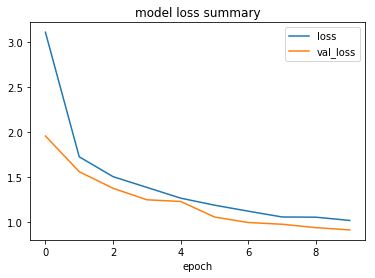

In [ ]:
plt.plot(hist.history['loss'], label="loss")
plt.plot(hist.history['val_loss'], label="val_loss")
plt.title("model loss summary")
plt.xlabel("epoch")
plt.legend()

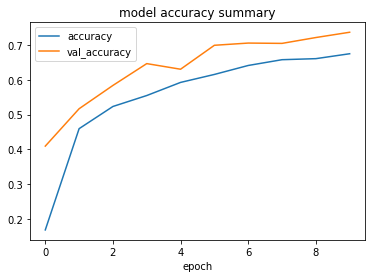

In [ ]:
plt.plot(hist.history['acc'], label="accuracy")
plt.plot(hist.history['val_acc'], label="val_accuracy")
plt.title("model accuracy summary")
plt.xlabel("epoch")
plt.legend()

### Evaluate the model
- score is a measure of loss, accuracy is a measure of performance (see above link)

In [ ]:
score1 = model.evaluate(X_test, y_test, verbose=0)
print("model score: {:.2f}, accuracy: {:.2f}".format(score1[0], score1[1]))

model score: 1.03, accuracy: 0.71


### View the convolution filters
- viewing the first and second Conv2D layers

model prediction:  No passing for vechi


Text(0.5, 1.0, 'No passing for vechi')

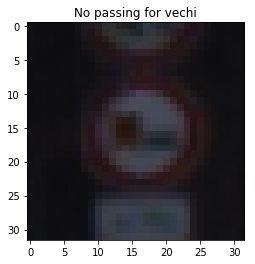

In [ ]:
e = eqh.reshape(1,32,32,1)
pred = model.predict_classes(e)
print("model prediction: ", str(labels[pred[0]]))
plt.imshow(img)
plt.title(lbl)

In [ ]:
l1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
l2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
l1Viz, l2Viz = l1.predict(e), l2.predict(e)
print(l1Viz.shape)
print(l2Viz.shape)

(1, 30, 30, 64)
(1, 13, 13, 32)


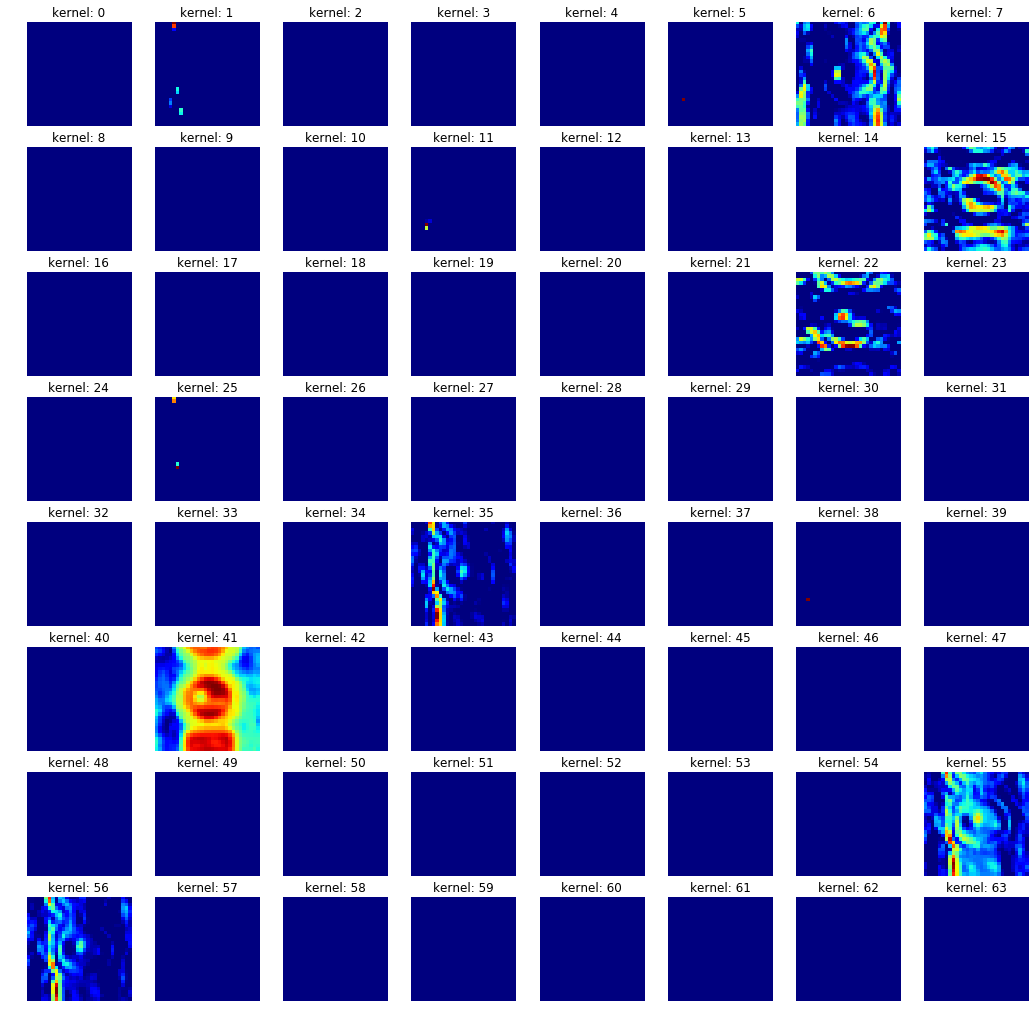

In [ ]:
rows = 8
cols = 8
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18,18))
#fig.tight_layout()
for i in range(0,64):
    ax = plt.subplot(rows, cols, i+1)
    ax.imshow(l1Viz[0,:,:, i], cmap='jet')
    ax.set_title("kernel: %d" % (i))
    plt.axis('off')

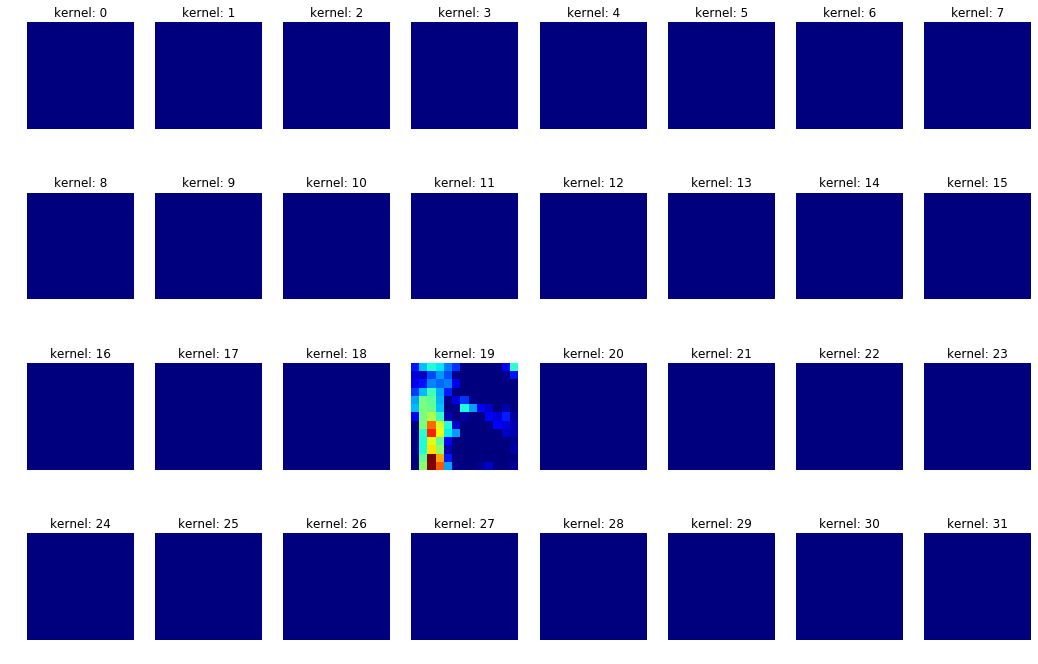

In [ ]:
rows = 4
cols = 8
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18,12))
#fig.tight_layout()
for i in range(0,32):
    ax = plt.subplot(rows, cols, i+1)
    ax.imshow(l2Viz[0,:,:, i], cmap='jet')
    ax.set_title("kernel: %d" % (i))
    plt.axis('off')

### Improve the model with image manipulations
- manipulate the training set to increase variation
- creates an iterator and uses the next command
- https://www.w3schools.com/python/python_iterators.asp

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
imageManipulations = ImageDataGenerator(width_shift_range=.1, height_shift_range=.1, zoom_range=.2, shear_range=.1, rotation_range=10)
imageManipulations.fit(X_train)

#### Check out some random samples of transformed images

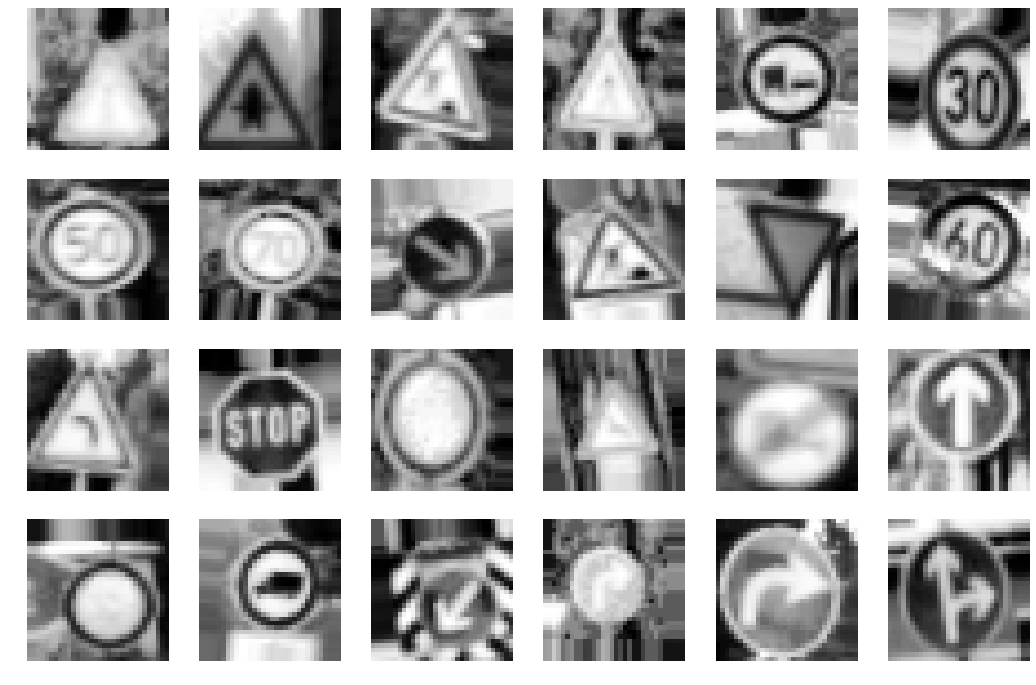

In [ ]:
imageBatches = imageManipulations.flow(X_train, y_train, batch_size=24)
X_batch, y_batch = next(imageBatches)
rows = 4
cols = 6
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18,12))
#fig.tight_layout()
for i in range(0,24):
    _img = X_batch[i].reshape(32,32)
    ax = plt.subplot(rows, cols, i+1)
    ax.imshow(_img, cmap='gray')
    plt.axis('off')

### Create and train a new model with the transform generator
- keras fit_generator https://www.pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/

In [ ]:
model2 = leNetModel()
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               590336    
__________

In [ ]:
hist2 = model2.fit_generator(imageManipulations.flow(X_train, y_train, batch_size=64), steps_per_epoch=1024, epochs=10, validation_data=(X_val, y_val), shuffle=1)

Epoch 1/10
2048/2048 [==============================] - 113s 55ms/step - loss: 2.2026 - acc: 0.3558 - val_loss: 1.2715 - val_acc: 0.5714
Epoch 2/10
 974/2048 [=============>................] - ETA: 59s - loss: 1.7612 - acc: 0.4624